<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

In [2]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



numDeriv     (NA     -> 2016.8-1.1) [CRAN]
rlang        (1.1.3  -> 1.1.4     ) [CRAN]
backports    (1.4.1  -> 1.5.0     ) [CRAN]
matrixStats  (NA     -> 1.3.0     ) [CRAN]
distribut... (NA     -> 0.4.0     ) [CRAN]
tensorA      (NA     -> 0.36.2.1  ) [CRAN]
checkmate    (NA     -> 2.3.1     ) [CRAN]
abind        (NA     -> 1.4-5     ) [CRAN]
processx     (3.8.3  -> 3.8.4     ) [CRAN]
posterior    (NA     -> 1.5.0     ) [CRAN]
data.table   (1.15.0 -> 1.15.4    ) [CRAN]


Installing 11 packages: numDeriv, rlang, backports, matrixStats, distributional, tensorA, checkmate, abind, processx, posterior, data.table

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpkHwc7b/remotes11b45de0b81/stan-dev-cmdstanr-c9369c4/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.0.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [3]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



[1] "2.35.0"

In [4]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘htmlwidgets’, ‘Rcpp’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’, ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpkHwc7b/remotes11b58d7fc5c/rmcelreath-rethinking-f3ac8de/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.40.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.5.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.40)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [6]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.09284448,0.2279088,-0.4446357,0.2395113,0.9999886,333.5157
b,1.17477466,0.2597801,0.7475127,1.5738904,1.0019738,383.6601


# Chapter 9

This chapter delves into some of the algorithms used for Bayesian inference.  **Statistical Rethinking** gives enough information for a working understanding of these algorithms.  A more-thorough, but-still-approachable treatment of these algorithms is given in Ben Lambert's great book [**A Student's Guide to Bayesian Statistics**](https://www.amazon.com/Students-Guide-Bayesian-Statistics/dp/1473916364).

## Easy

### 9E1
Which of the following is a requirement of the simple Metropolis algorithm?
1.   The parameters must be discrete.
2.   The likelihood function must be Gaussian.
3.   The proposal distribution must be symmetric.

#### Answer
I think it may be good to start with an overview of the simple Metropolis algorithm.

Start by imagining a space of values for parameters $\theta$.  We could define a space for as many parameters as we want, but let's now only imagine a single parameter.  This one-parameter space can be thought of as a sinlge line stretching from left (smaller values) to right (larger values); the probability that for any given value is given by the posterior probability density $p(\theta|data)$ where more-probable values are higher than less-probable values.

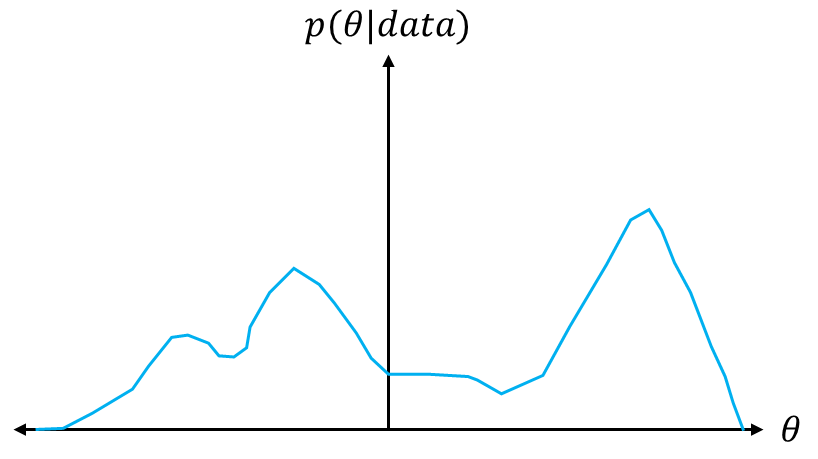

Of course, we don't know the posterior distribution (if we did, we wouldn't be trying to estimate it).  Instead, we can propose one value at a time for $\theta$ and then calculate $p(data|\theta)p(\theta)$.  This needs a name; since its the likelihood $p(data|theta)$ *weighted* by its prior $p(\theta)$, I'll refer to it as the "weighted likelihood".  Notice that the weighted likelihood is the numerator of Bayes' theorem $p(\theta|data) = \frac{p(data|\theta)p(\theta)}{p(data)}$, which means that the weighted likelihood is proportional to the posterior distribution $p(\theta|data) \propto p(data|\theta)p(\theta)$.

So we start by accepting a random value $cT_0$ ($c$ for "current", as in *the current value of $T$*) for $\theta$ and estimating its weighted likelihood, $wL_0$.  Next, we suggest another random value $sT_1$ ($s$ for "suggested", as in *a suggested value of $T$ that may replace $cT$*) for $\theta$ and calculate its weighted likelihood $wL_1$.  If $wL_1 > wL_0$, then we make a tally mark for $sT_1$.   But if $wL_1 < wL_0$, then we must choose between $cT_0$ vs $sT_1$.  In this situation, we choose according to the ratio $\frac{wL_1}{wL_0}$.  For example, if $\frac{wL_1}{wL_0} = \frac{1}{2}$, implying that $wL_1$ was half as large as $wL_0$, then we accept $wL_1$ half of the time and $wL_0$ the other half of the time.  Whichever we accept, we make a tally for that $T$.  Then we repeat this process.  Whichever $T$ was previously accepted becomes $cT$, so either $cT_0$ or $cT_1$, and it's compared against a new randomly suggested $sT_2$ in the same way.  When we repeat this process many times, we get a chain of accepted $T$ values--this chain is a "Markov chain".  We can plot the tally marks for the various $T$ values like a histogram; this histogram will approximate our posterior distribution.

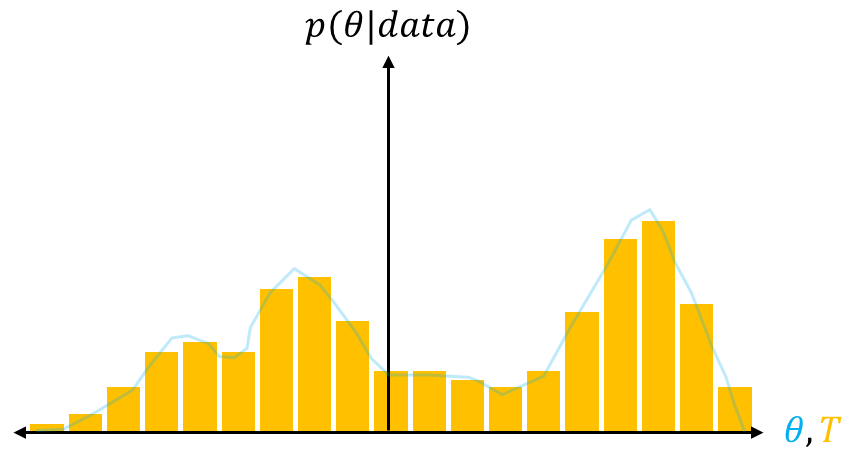

\

Now let's take the questions one at a time.

***1. The parameters must be discrete.***

Although the example given in the book uses discrete islands, discrete parameter values are **NOT required** of the Metropolis algorithm.  You simply need to be able to propose specific values for $\theta$, but these proposed values can come from either discrete or continuous spaces.

\

***2.The likelihood function must be Gaussian.***

This, again, is **NOT required**.  The expression we must continually examine, the weighted likelihood $p(data|\theta)p(\theta)$, is indifferent to distribution of the the likelihood.

\

***3. The proposal distribution must be symmetric.***

This one **IS required**.  The reason as to *why* is not expliciit in my explanation of the Metropolis alogrithm, so let's rectify that now.

Firstly, let's be clear about what we mean by a "symmetric proposal distribution".  Basically, we need to make sure that if we propose $T_b$ from $T_a$, we would be just as likely to propse $T_a$ from $T_b$.  Second, don't lose track of the difference between "proposing" and "accepting"; just because we need to be equally likely to *propose* $T_b$ from $T_a$ and $T_a$ from $T_b$, we will not be equally likely to *accept* $T_b$ from $T_a$ and $T_a$ from $T_b$; acceptance will depend on $\frac{wL_a}{wL_b}$ and $\frac{wL_b}{wL_a}$ as explained above.

With that out of the way, a rough explanation for the necessity of symmetric proposals is that, since the accepted values that constitute the Markov chain are already being filtered by the acceptance rule, additional filtering by an asymmetric proposal distribution could bias the Markov chain away from the actual posterior distribution.  A more technical explanation involves some background.

Imagine sampling $\theta$ values from our actual posterior distribution; more probable $\theta$ values would be sampled more frequently, and vice versa.  So after $n$ samples, we would have the set $\{\theta_1, ..., \theta_n \}$, and the probability of having drawn that sample would be the joint probability distribution $p(\theta_1, ..., \theta_n)$.  The idea behind using Markov chains to estimate the posterior distribution is to design the Markov chain such that it generates values $\{T_1, ..., T_n \}$ where $p(T_1, ..., T_n) \rightarrow p(\theta_1, ..., \theta_n)$ as $n$ gets large enough.  The accept-reject rule pushes the Markov chain towards the posterior.

Importantly, once $p(T_1, ..., T_n) \approx p(\theta_1, ..., \theta_n)$--that is, once the joint probabitliy distribution from our Markov chain is close to that of the samples from the posterior distribution--it should remain there rather than drifting away from the true posterior.  In order to remain stationary, the proposal distribution must be symmetric.  This statement really demands a demonstration.

Say we have two values from our Markov chain $T_a \sim p(\theta|data)$ and $T_b \sim (p\theta|data)$, where $p(T_b) > p(T_a)$.  If we are currently at $cT_a$, then we next propose $sT_b$ with probabilty $p(sT_b | cT_a)$.  Since $p(T_b) > p(T_a)$, we always accept this proposal.  So our Markov chain looks like $\{T_a, T_b \} \sim p(T_a, T_b) = p(T_a) \times p(sT_b | cT_a)$.

Now instead, start at $cT_b$ and propose $sT_a$ with probability $p(sT_a | cT_b)$.   Since $p(T_b) > p(T_a)$, we do NOT automatically accept this proposal; instead, we accept it as $\frac{wL_a}{wL_b}$.  So this version of our Markov looks like $\{T_b, T_a \} \sim p(T_b, T_a) = p(T_b) \times p(sT_a | cT_b) \times \frac{p(T_a)}{p(T_b)} = p(sT_a | cT_b) \times p(T_a)$.

Whether we start at $cT_a$ or $cT_b$, we need to settle on the same (actual posterior) distribution.  This means that $p(T_a, T_b) := p(T_b, T_a)$ and $p(T_a) \times p(sT_b | cT_a) := p(sT_a | cT_b) \times p(T_a)$, which means that $p(sT_b | cT_a) := p(sT_a | cT_b)$.  In other words, the proposal distribution for $cT_a \rightarrow sT_b$ must be equal/symmetric to $cT_b \rightarrow sT_a$

NOTE: There is a variant of the Metropolis algorithm, the "Metropolis-Hastings" algorithm, that permits non-symmetric proposals.  This is useful for bounded parameters, like standard deviation.  We won't trouble ourselves with its details here, though.

### 9E2
Gibbs sampling is more efficient than the Metropolis algorithm. How does it achieve this extra efficiency? Are there any limitations to the Gibbs sampling strategy?

#### Answer
Gibbs is another algorithm.  It can sample the posterior more efficiently than Metropolis; in fact, whereas Metropolis is rejecting some proporotion of proposals, Gibbs is able to accept all proposals.  The way it does this requires >= 2 parameters.  It makes increasingly good proposals because it proposals values for, say, $\theta_a$ based on its relationship with all other parameters; as the posterior is better mapped, the relationships among parameters is increasingly delineated and so the proposals get better.  Let's take an example with 2 samples.

Say we have data $y$ and parameters $\theta_1 \sim .$ and $\theta_2 \sim .$, where the parameters have defined prior distributions.  
1.   We start generating a random value for both $\theta_1$ and $\theta_2$ from their respective priors, $\theta^0_1$ and $\theta^0_2$.  
2.   Now we must up pick one parameter to update, conditional on the other parameter and the data. Say we pick $\theta_1$ to update first.  Then we randomly generate another value for this parameter, $\theta^1_1$, **conditional** on the the other parameter and the data, $\theta^1_1 \sim p(\theta^1_1 | \theta^0_2, y)$.
3.   Then we update $\theta_2$ in a similar way, but using the updated $\theta_1$, like $\theta^1_2  \sim p(\theta^1_2 | \theta^1_1, y)$.
4.   We repeat this, always updating on the most current parameter estimates, until we think we've adequately mapped the posterior distirbution.

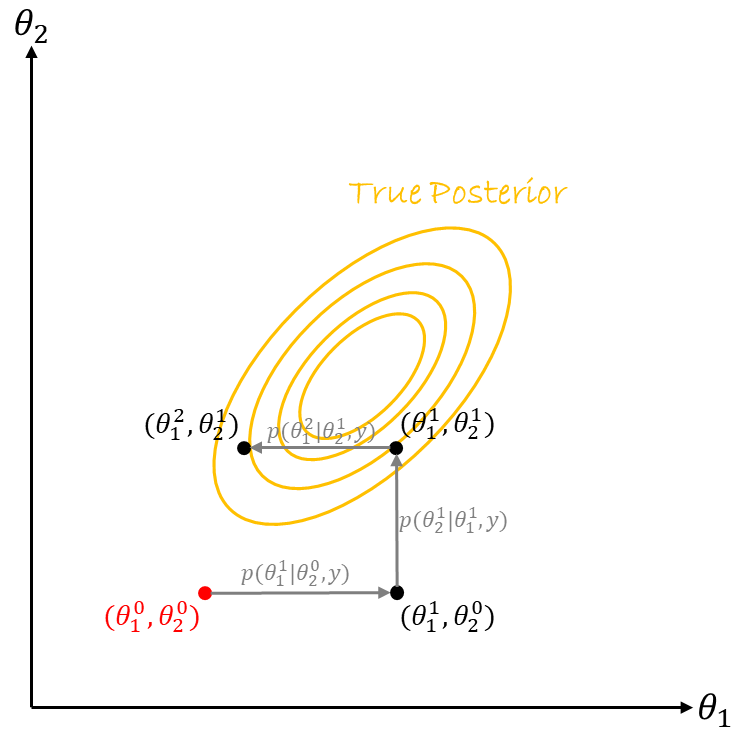

So Gibbs can be very efficient.  However, the computations in each step require "conjugate priors".  This book doesn't talk much about conjugate priors, probably because they are unnecessary once your have adequate computing power, but their basically a type of prior that multiplies nicely with your likelihood such that you could perform calculation by hand.  This is nice, but we often want priors that *don't* play nice with the likelihood.  Since Gibbs relies on these conjugates, it is inherently less flexible than other algorithms.

### 9E3
Which sort of parameters can Hamiltonian Monte Carlo not handle? Can you explain why?

#### Answer
The answer here comes with a caveat; first the answer, then the caveat.  

HMC is a Newtonian-physics simulation of motion of a *parameter particle* gliding across smooth-continuous *negative-log posterior (NLP) space*.  NLP space has as many dimensions as our model has parameters (each parameter defines a dimension in NLP space), and the position of our particle in NLP space identifies values for each parameter based on it postion relative to each dimension.  Over several simulations, since our particle will visit locations in NLP space that represent more-probable sets of parameter values, we flesh out the posterior.

The simulation uses a formulation of Newtonian mechanics called, naturally, the "Hamiltonian".  The Hamiltonian $H$ is the sum of *Kinetic Energy (KE)*, a function of momentum $\rho$, and *Potential Energy (PE)*, a function of position $x$:

$$H(\rho, x) = KE + PE = k(\rho) + p(x)$$

To track our particle, we need to track the change in both $KE$ and $PE$--for which we need the *gradient* $\nabla$ of $H$, which is just the partial derivatives of $H$ with respect to $\rho$ and $x$ like

$$\nabla H =
  \begin{bmatrix}
  \frac{\partial}{\partial\rho}H \\
  \frac{\partial}{\partial x}H
  \end{bmatrix}
  =
  \begin{bmatrix}
  \frac{\partial}{\partial\rho}k(\rho) \\
  \frac{\partial}{\partial x}p(x)
  \end{bmatrix}$$

It turns out that the change of a Hamiltonian's kinetic energy with respect to momentum $\frac{\partial}{\partial\rho}H = \frac{\partial}{\partial\rho}k(\rho)$ is the change in position with respect to time $\frac{d}{dt}x$, and the change in a Hamiltonian's potential energy with respect to position $\frac{\partial}{\partial x}H = \frac{\partial}{\partial x}p(x)$ is the *negatvie* change in momentum with respect to time $\frac{d}{dt}\rho$,

$$\frac{\partial}{\partial\rho}k = \frac{d}{dt}x$$
$$\frac{\partial}{\partial x}p = -\frac{d}{dt}\rho \rightarrow -\frac{\partial}{\partial x}p = \frac{d}{dt}\rho$$

All of this to say, the HMC uses derivatives, which requires smooth continuous functions.  Hence, HMC doesn't work with discrete parameters.

\

**Now, the caveat.**  It actually *is* possible to use discrete parameters indirectly.  We can do this by "marginalizing" them out...which basically means summing the joint probability distribution (represented by NLP space) over all possible values of the discrete parameter(s).  For example, with continuous parameters $\vec{\beta}$ and discrete parameter $\gamma$, we marginalize $\gamma$ out of the joint probability distribution like $p(\vec{\beta}) = \sum_{i=1}^k p(\vec{\beta}, \gamma_i)$.  

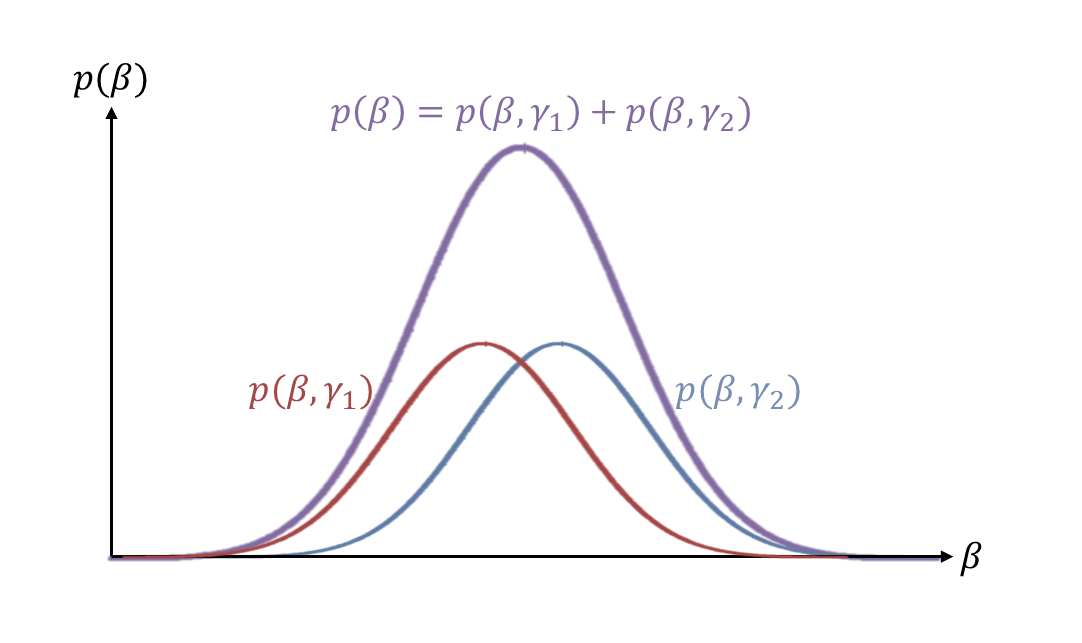

There's a few complexities once you consider that HMC is operating in (negative) **log** probability space, but this is the general idea.

### 9E4
Explain the difference between the effective number of samples, `n_eff` as calculated by Stan, and the actual number of samples.

#### Answer
As a first pass, the **effective sample size** (`n_eff`) is an estimate of the number of <u>independent</u> samples which constitute the information contained in the posterior distribution.  *Why would we need an estimate?  Why not just rely on the number of iterations our HMC churns through?*  Because the sample produced on each iteration can be <u>dependent</u> on previous iterations' samples.  Since dependence among samples implies that samples share common information, highly-dependent samples will be less informative than independent (or anti-dependent) samples.

It might be interesting to know how `n_eff` is estimated.  Consider trying to estimate a parameter; we'll generically call this parameter $\theta$, but let's temporarily assume we're estimating the mean $\theta = \mu$.  Our estimate of any parameter, $\hat{\mu}$ in this case, is given by

$$\hat{\mu} = \frac{1}{N} \sum_{i=1}^n \tilde{\mu}_i$$

where $N$ is the sample size and $\tilde{\mu}_i$ is a single sample.  $\hat{\mu}$ is distributed like

$$\hat{\mu} \sim normal({\sf mean} = \mu, {\sf std. dev.} = SE(\hat{\mu}))$$

where

$$SE(\hat{\mu}) = \frac{\hat{\sigma}}{\sqrt{N}}$$

where $\hat{\sigma}$ is the estimated standard deviation.  So our estimate $\hat{\mu}$ converges to $\mu$ like $\frac{1}{\sqrt{N}}$.  In other words the $SE$ converges to 0 as $N$ approaches infinity.

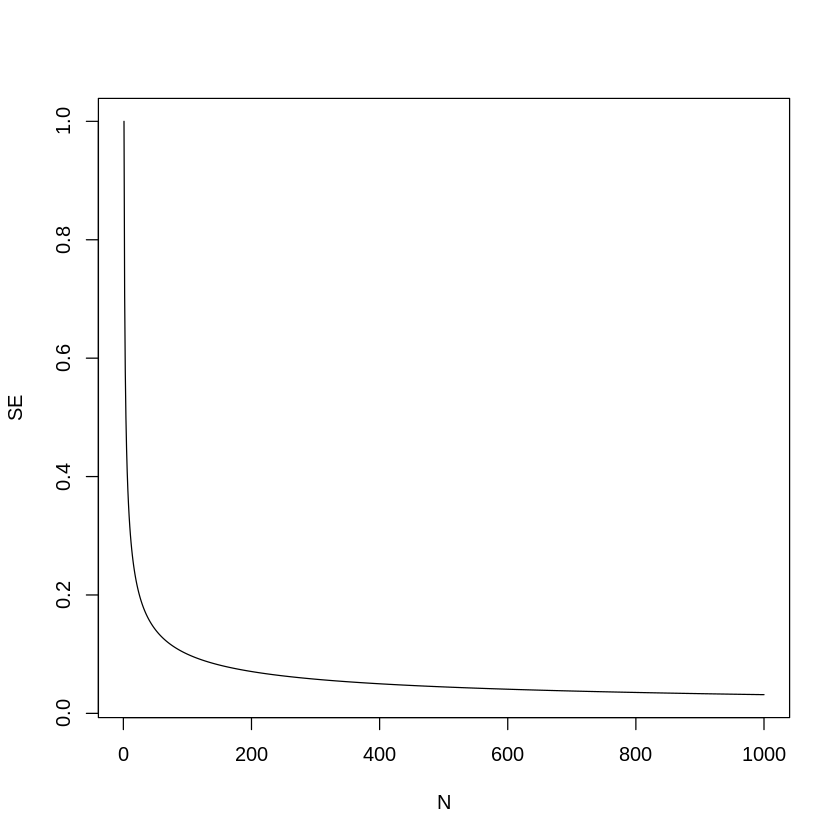

In [ ]:
sigma_hat <- 1
N <- 1:1000
SE <- sigma_hat / sqrt(N)

plot(SE ~ N, type="l")

Importantly, this has assumed $N$ represents <u>independent</u> samples.  We can think of $n_{eff}$ as the number of <u>independent</u> samples $N$ required to give the same standard error that we obtained with the quantity of our <u>dependent</u> samples $n$.

Let's see an expression for $n_{eff}$.

$$n_{eff} = \frac{n}{1 + 2 \sum_{l=1}^{L < n} \hat{\rho}_l} \approx N$$

where $n$ is the total number of iterations (across all chains) and $\hat{\rho}_l$ is the estimated correlation between one iteration and another iteration $l$ iterations away.  We sum $\hat{\rho}_l$'s to the $L^{th}$ lag, which must be less than $n$ since we can't have as many lags as/more lags than we have iterations.  $L$ is often $<<$ $n$ since large lags are estimated from less data and are therefore more unstable/unreliable.

The derivation for this is a bit technical and requires some know-how in manipulating variances and covariances, but the intuition is straightforward.  We know that correlation among samples will ensure that $n_{eff} < n$, and this is demonstrated in dividing $n$ by a function of all those correlations.  The $1$ and $2$ sneak in there.  The $2$ accounts for the fact that correlations between different iterations are bidrectional/symmetric and so contribute twice to $n_{eff}$.  The $1$ represents *self correlation* $\hat{\rho}_0$, which always equal $1$; it's removed from the summation (which starts at $l=1$, omitting $l=0$) because this self-correlation only contributes once to $n_{eff}$.

As a sanity check, notice that if there is no autocorrelation among iterations, then $n_{eff} = n = N$.

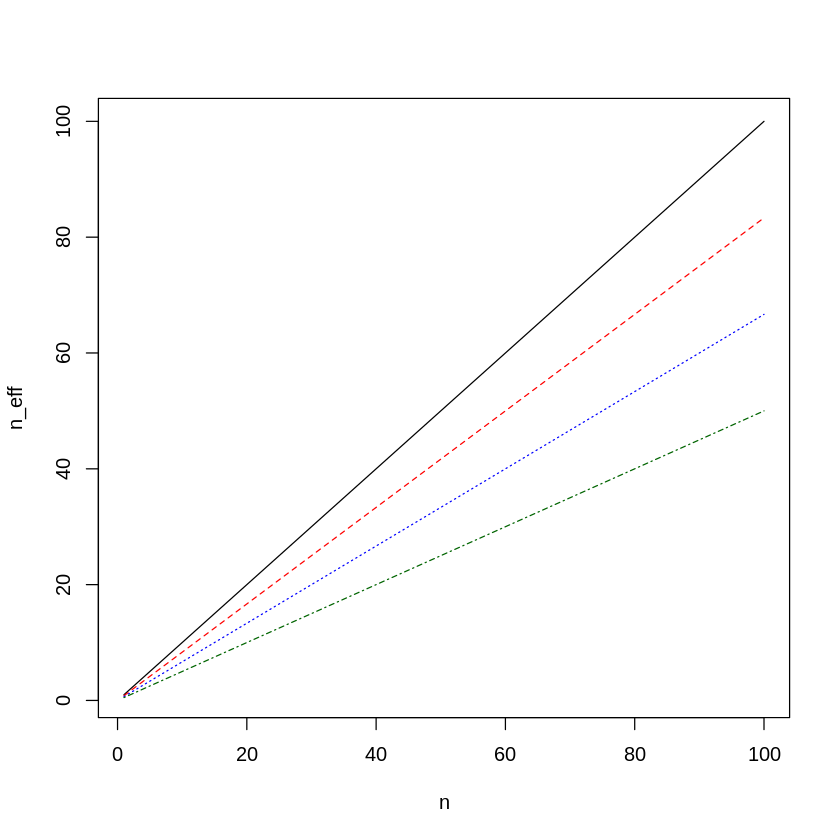

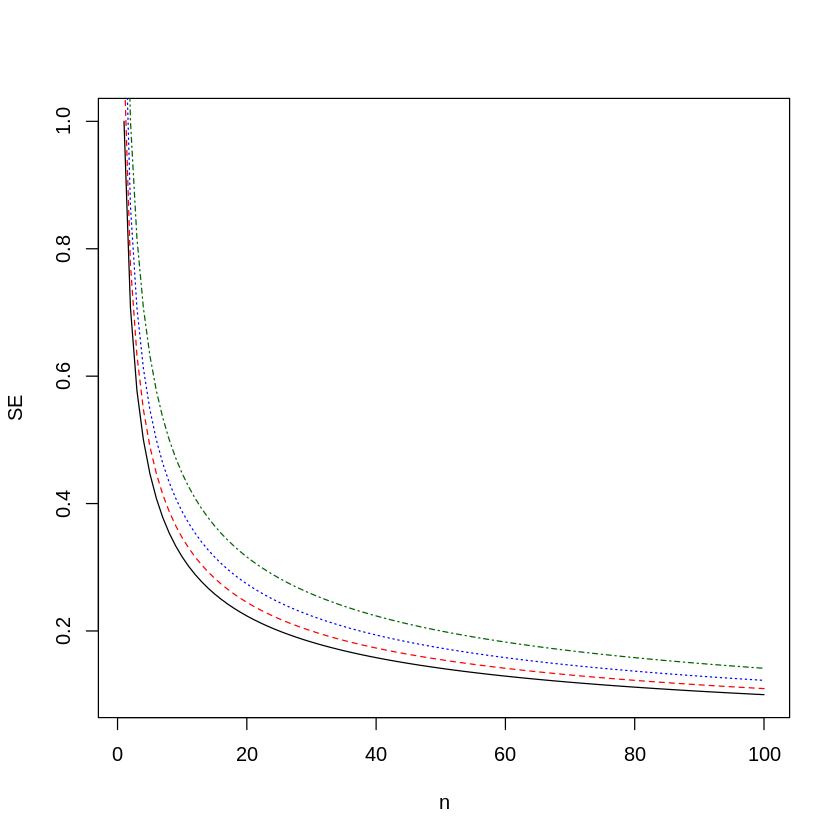

In [ ]:
n <- 1:100
sum_rho0 <- 0.00
sum_rho1 <- 0.10
sum_rho2 <- 0.25
sum_rho3 <- 0.50
n_eff0 <- n / (1 + 2*sum_rho0)
n_eff1 <- n / (1 + 2*sum_rho1)
n_eff2 <- n / (1 + 2*sum_rho2)
n_eff3 <- n / (1 + 2*sum_rho3)

plot(n_eff0 ~ n, type="l", col="black", lty=1, ylab="n_eff")
lines(n_eff1, col='red', lty=2)
lines(n_eff2, col="blue", lty=3)
lines(n_eff3, col="darkgreen", lty=4)

plot(sigma_hat / sqrt(n_eff0) ~ n, type="l", col="black", lty=1, ylab="SE")
lines(sigma_hat / sqrt(n_eff1) ~ n, col="red", lty=2)
lines(sigma_hat / sqrt(n_eff2) ~ n, col="blue", lty=3)
lines(sigma_hat / sqrt(n_eff3) ~ n, col="darkgreen", lty=4)

### 9E5
Which value should `Rhat` approach, when a chain is sampling the posterior distribution correctly?

#### Answer
Straightforwardly, the answer is 1.0.  But it might be useful to understand why this value indicates convergence.

Rhat is basically an ANOVA, a common type of hypothesis test in frequentist statistics that is used to assess differences between groups.  In ANOVA, the test statistic is $F$--a ratio between *between-group* variance and *within-group* variance, $F=\frac{var[\sf{between \ groups}]}{var[\sf{within \ groups}]}$.  If there is no difference between groups, then $var[\sf{between \ groups}] \approx var[\sf{within \ groups}]$ such that $F \approx 1.0$.  However, if the groups do differ, then $var[\sf{between \ groups}] > var[\sf{within \ groups}]$ such that $F > 1.0$.

The same idea is applied with Rhat, but with the posterior values visited by our Markov chains acting as the groups: $\hat{R} = \frac{var[\sf{between \ chains}]}{var[\sf{within \ chains}]}$.  If our chains have converged, then $var[\sf{between \ chains}] \approx var[\sf{within \ chains}]$ such that $\hat{R} \approx 1.0$.  Conversely, if the chains have explored separate portions of posterior space (have not converged), then $var[\sf{between \ chains}] > var[\sf{within \ chains}]$ such that $\hat{R} > 1.0$.

### 9E6 and 9E7
Sketch a good trace plot for a Markov chain, one that is effectively sampling from the posterior distribution. What is good about its shape? Then sketch a trace plot for a malfunctioning Markov chain. What about its shape indicates malfunction?

Repeat the problem above, but now for a trace rank plot.

#### Answer
**Trace** plots and **trank** plots both track the parameter values visited by the chains of you MCMC, but the trace plot tracks them sequentially while trank plots track them by frequency.  So in a trace plot, the x-axis is the sequence of visited values and the y-axis is the parameter value.  But in a trank plot, which is just overlapping histograms, the x-axis is parameter values while the y-axis is the frequency which a parameter value was visited. I'll chop up Figure 9.9 to roughly show how trace plots and trank plots relate.

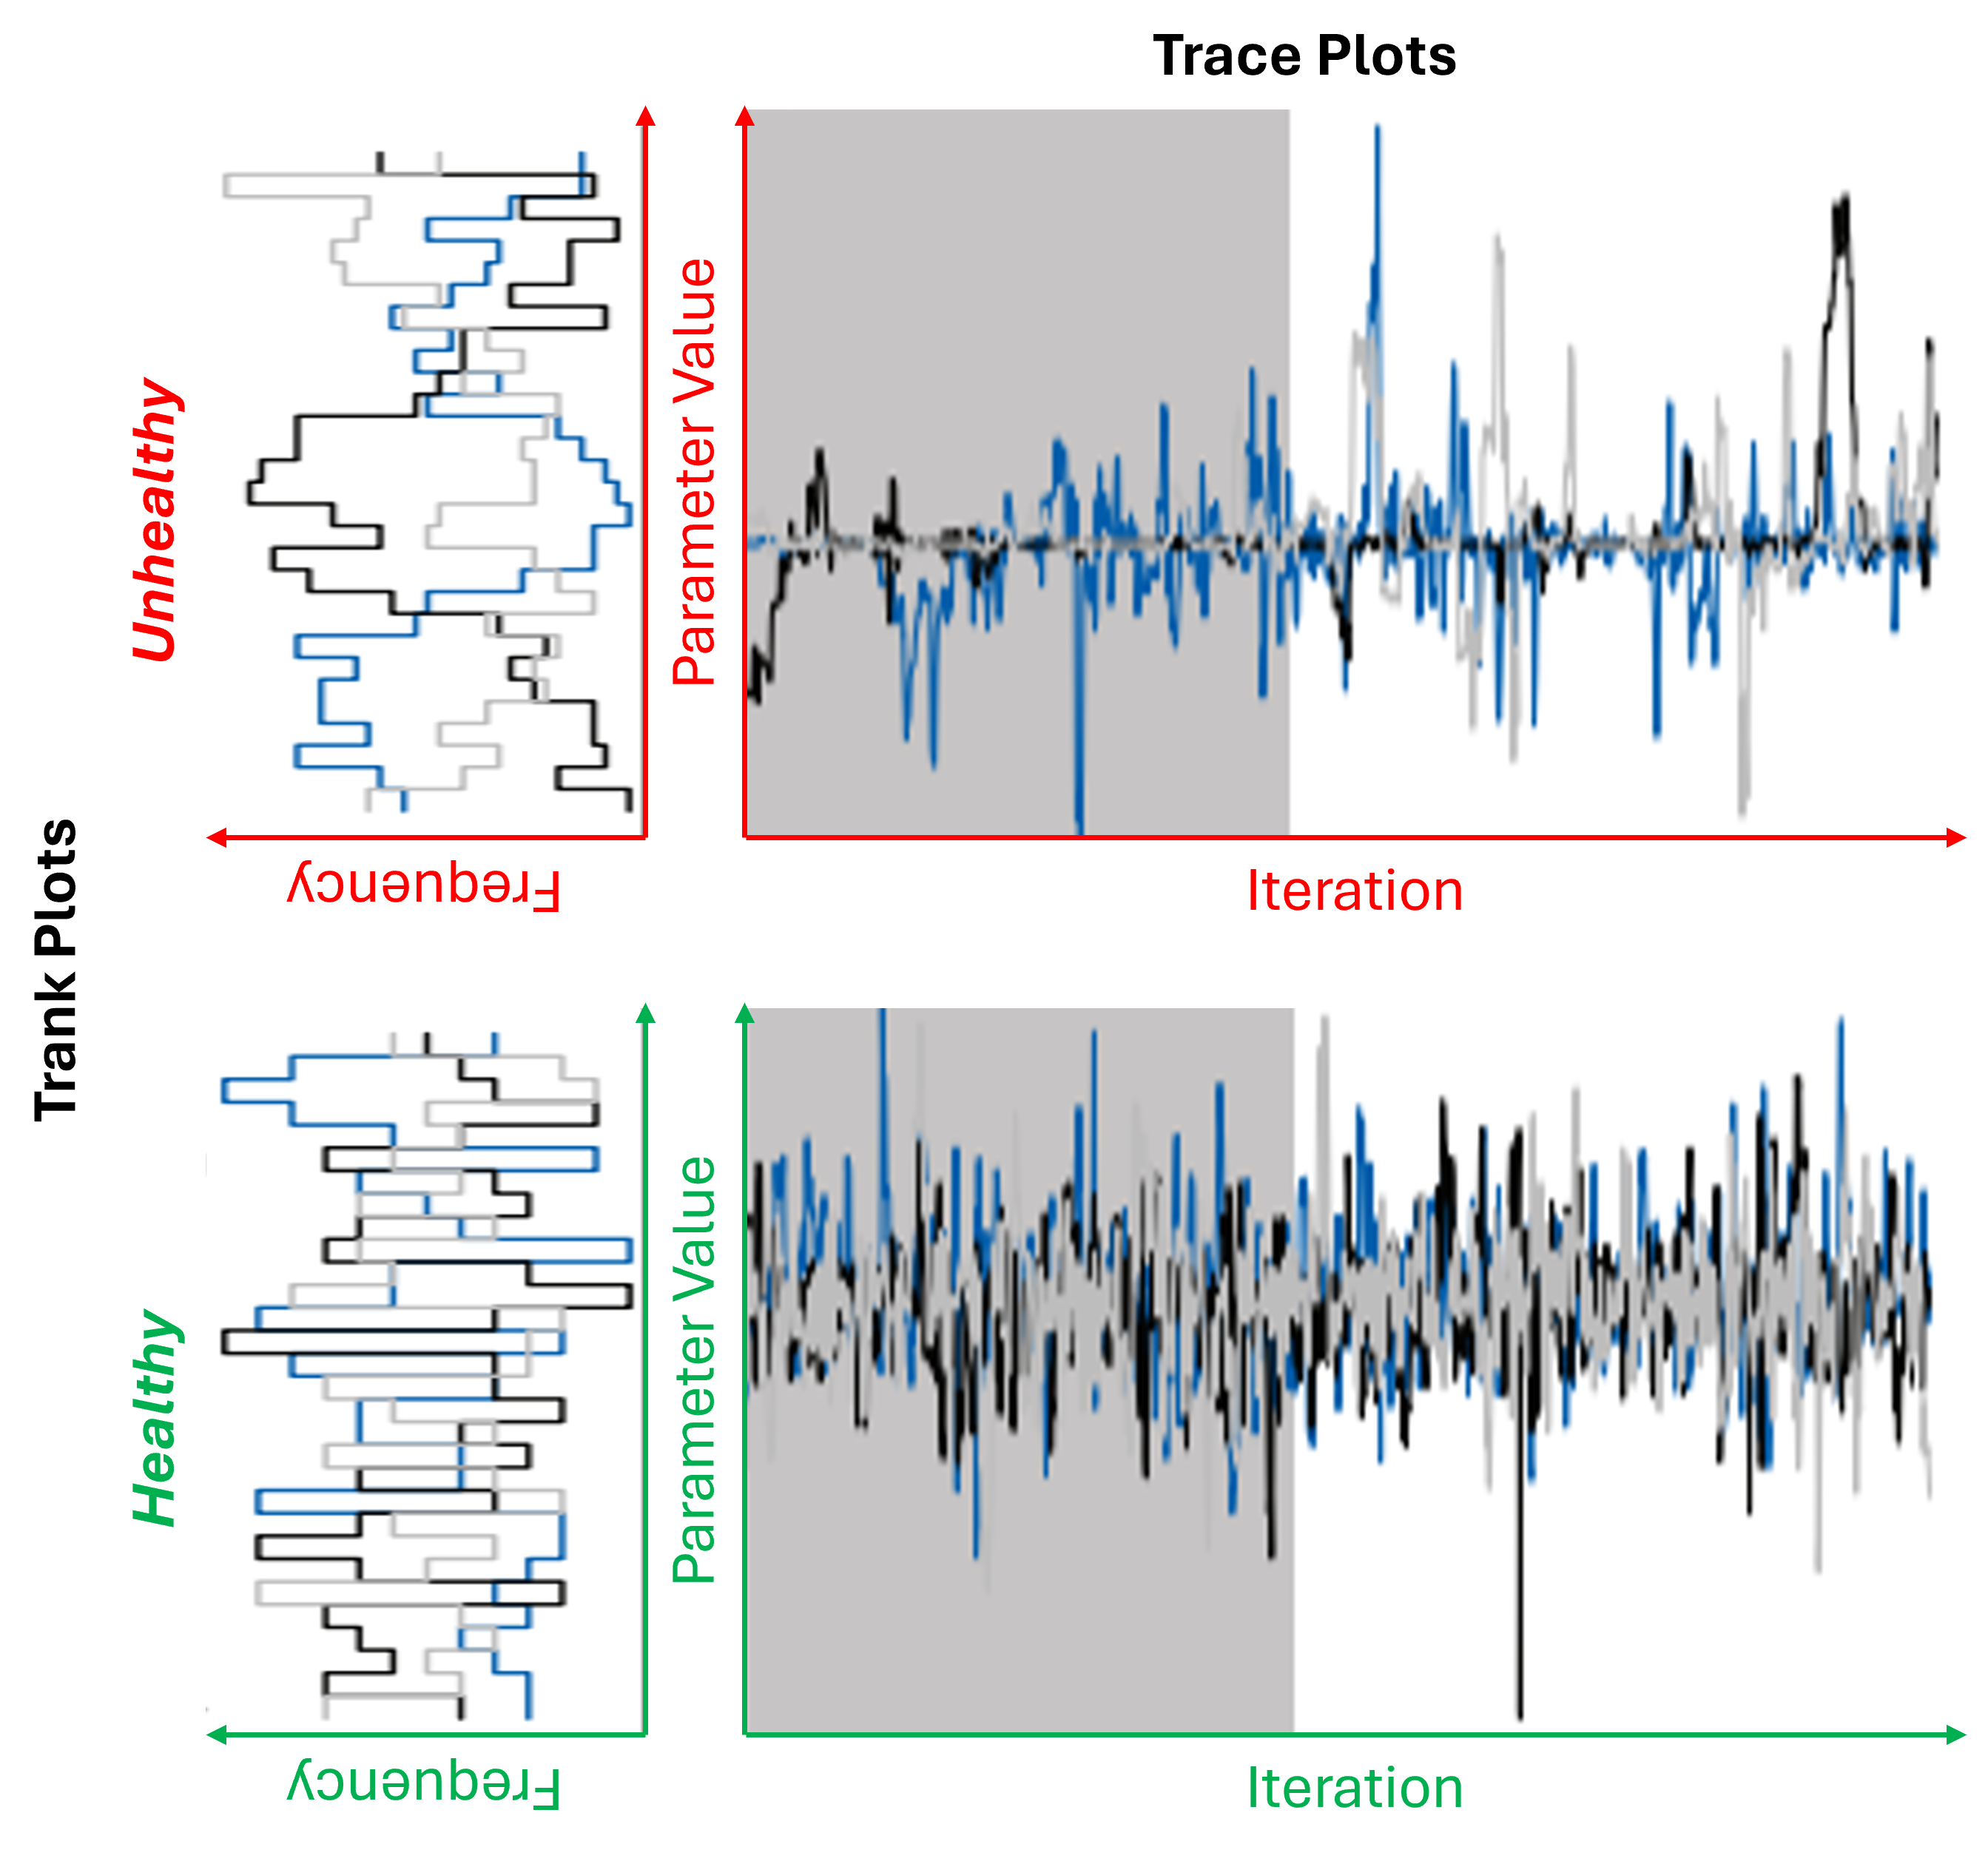

A healthy trace plot wil contain a think horizontal band common to each chain ("stationarity" and "converge"), signifying that the MCMC chains are focused on a cetnral region of posterior space, and good mixing between chains.  A healthy trank plot will have similar looking histograms.

## Medium

### 9M1
Re-estimate the terrain ruggedness model from the chapter, but now using a uniform prior for the standard deviation, `sigma`. The uniform prior should be `dunif(0,1)`. Use `ulam` to estimate the posterior. Does the different prior have any detectible influence on the posterior distribution of sigma? Why or why not?

#### Answer
Let's first get our data together, as shown in code block `9.11`.

In [7]:
data(rugged)
d <- rugged
d$log_gdp <- log(d$rgdppc_2000)
dd <- d[ complete.cases(d$rgdppc_2000) , ]
dd$log_gdp_std <- dd$log_gdp / mean(dd$log_gdp)
dd$rugged_std <- dd$rugged / max(dd$rugged)
dd$cid <- ifelse( dd$cont_africa==1 , 1 , 2 )

Now let's get to the `ulam` version presented in the chapter `m9.1`; we'll have to start by getting our data into a list.

In [8]:
dat_slim <- list(log_gdp_std = dd$log_gdp_std,
                 rugged_std = dd$rugged_std,
                 cid = as.integer( dd$cid))

In [9]:
m9.1 <- ulam(
  alist(
    log_gdp_std ~ dnorm(mu, sigma),
      mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
      sigma ~ dexp(1)
  ), data=dat_slim,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b532e39c2.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b532e39c2.stan', line 19, column 4 to column 39)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 3 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 3 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 3 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 4 Iteration: 700 

And now, the `sigma ~ dunif` version.

In [10]:
m9.1_unif <- ulam(
  alist(
    log_gdp_std ~ dnorm(mu, sigma),
      mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
      sigma ~ dunif(0,1)
  ), data=dat_slim,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain

How should we go about comparing these?

We might start by looking at their `precis` outputs.

In [11]:
round(precis(m9.1, depth=2),2)
round(precis(m9.1_unif, depth=2),2)

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.89,0.02,0.86,0.91,1,2404.22
a[2],1.05,0.01,1.03,1.07,1,3332.11
b[1],0.13,0.08,0.01,0.25,1,2395.88
b[2],-0.14,0.05,-0.23,-0.06,1,2837.56
sigma,0.11,0.01,0.10,0.12,1,2529.28


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.89,0.02,0.86,0.91,1,2806.70
a[2],1.05,0.01,1.03,1.07,1,2483.53
b[1],0.13,0.07,0.02,0.25,1,2362.54
b[2],-0.14,0.05,-0.23,-0.05,1,2658.06
sigma,0.11,0.01,0.10,0.12,1,2419.62


The descriptive stats for both models (for `sigma`) are basically identical. But these values only give a very rough view; we can do better by visualizing the posteriors.

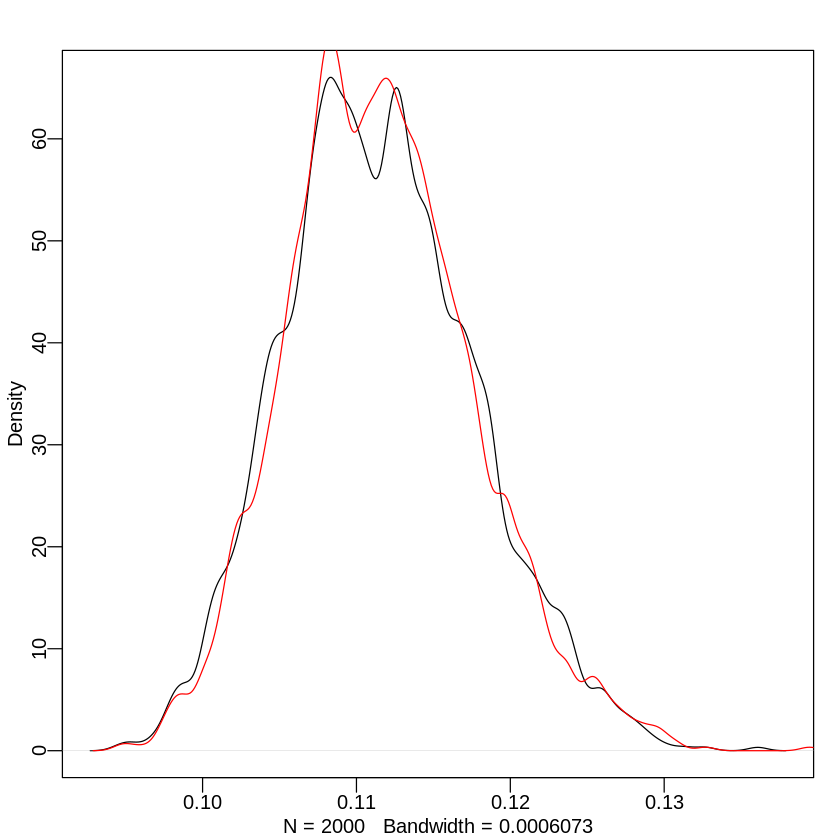

In [12]:
post_exp <- extract.samples(m9.1)
post_unif <- extract.samples(m9.1_unif)

dens(post_unif$sigma)
dens(post_exp$sigma, add=TRUE, col="red", lty=1)

So ya, pretty identical.  But why? Why should different priors lead to (basically) identical posteriors?  Because, apparently, there is enough information in the data (likelihood) to overwhelm the influence of the prior.

### 9M2
Modify the terrain ruggedness model again. This time, change the prior for `b[cid]` to `dexp(0.3)`.  What does this do to the posterior distribution? Can you explain it?

#### Answer
I'm not sure if we're meant to modify `m9.1` or `m9.1_unif`, but I'm guessing we're meant to modify `m9.1`.  Let's just jump in with the model.

In [13]:
m9.1b <- ulam(
  alist(
    log_gdp_std ~ dnorm(mu, sigma),
      mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dexp(0.3),
      sigma ~ dexp(1)
  ), data=dat_slim,
     chains=4,
     cores=4,
     iter=1000)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b4f308279.stan', line 19, column 4 to column 39)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b4f308279.stan', line 19, column 4 to column 39)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 2 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 50

Before looking at the posterior, can you guess what might happen (at least to `b[cid]`)?

Given that the exponential distribution is necessarily positive, we should expect to see that the posterior for `b[cid]` is entirely above 0.

,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.89,0.02,0.86,0.91,1,2404.22
a[2],1.05,0.01,1.03,1.07,1,3332.11
b[1],0.13,0.08,0.01,0.25,1,2395.88
b[2],-0.14,0.05,-0.23,-0.06,1,2837.56
sigma,0.11,0.01,0.10,0.12,1,2529.28


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],0.89,0.02,0.86,0.92,1,1686.46
a[2],1.05,0.01,1.03,1.06,1,1341.65
b[1],0.15,0.07,0.04,0.27,1,1342.01
b[2],0.02,0.02,0.00,0.05,1,930.34
sigma,0.11,0.01,0.10,0.13,1,1445.15


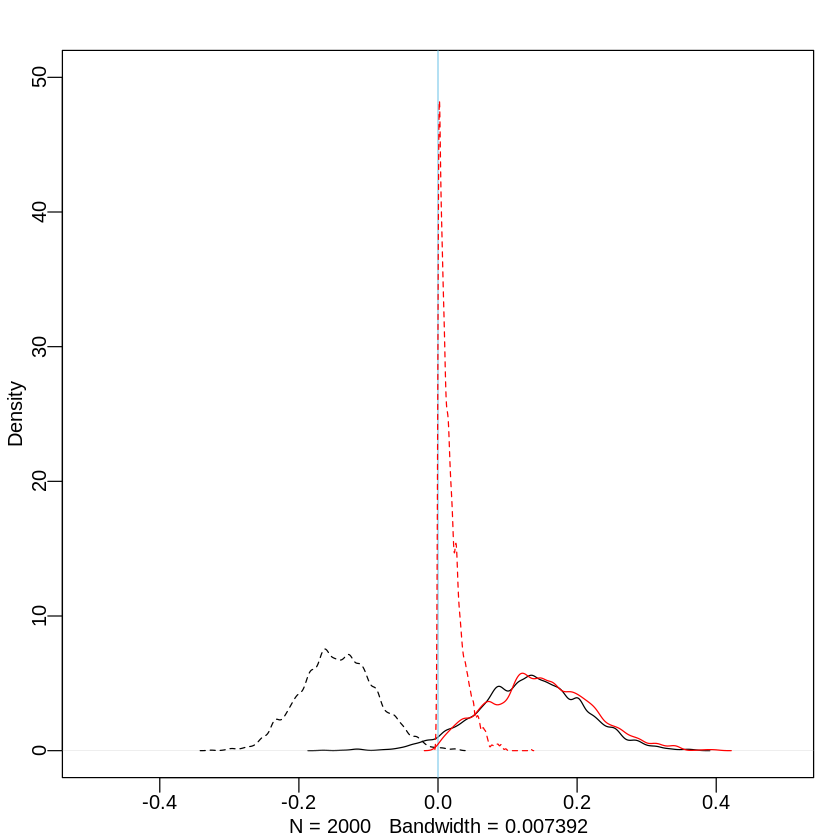

In [14]:
round(precis(m9.1, depth=2),2)
round(precis(m9.1b, depth=2),2)

post <- extract.samples(m9.1)
postb <- extract.samples(m9.1b)

dens(post$b[,1], col="black", lty=1, xlim=c(-0.5, 0.5), ylim=c(0, 50))
abline(v=0, col="skyblue")
dens(post$b[,2], add=TRUE, col="black", lty=2)
dens(postb$b[,1], add=TRUE, col="red", lty=1)
dens(postb$b[,2], add=TRUE, col="red", lty=2)

### 9M3
Re-estimate one of the Stan models from the chapter, but at different numbers of warmup iterations. Be sure to use the same number of sampling iterations in each case. Compare the `n_eff` values. How much warmup is enough?

#### Answer
Let's just use `m9.1`.  We'll run it 3 times, each for 200 iterations.  The default warmup is the number of iterations, but we can adjust that with the `warmup` argument.

In [17]:
m9.1_w3 <- ulam(
  alist(
    log_gdp_std ~ dnorm(mu, sigma),
      mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
      sigma ~ dexp(1)
  ), data=dat_slim,
     chains=4,
     cores=4,
     iter=200,
     warmup=3)

m9.1_w10 <- ulam(
  alist(
    log_gdp_std ~ dnorm(mu, sigma),
      mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
      sigma ~ dexp(1)
  ), data=dat_slim,
     chains=4,
     cores=4,
     iter=200,
     warmup=10)

m9.1_w33 <- ulam(
  alist(
    log_gdp_std ~ dnorm(mu, sigma),
      mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
      sigma ~ dexp(1)
  ), data=dat_slim,
     chains=4,
     cores=4,
     iter=200,
     warmup=33)

m9.1_w100 <- ulam(
  alist(
    log_gdp_std ~ dnorm(mu, sigma),
      mu <- a[cid] + b[cid]*(rugged_std - 0.215),
        a[cid] ~ dnorm(1, 0.1),
        b[cid] ~ dnorm(0, 0.3),
      sigma ~ dexp(1)
  ), data=dat_slim,
     chains=4,
     cores=4,
     iter=200,
     warmup=100)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 WARNING: No variance estimation is 
Chain 1          performed for num_warmup < 20 
Chain 1 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 1 Iteration:   4 / 200 [  2%]  (Sampling) 
Chain 1 Iteration: 103 / 200 [ 51%]  (Sampling) 
Chain 1 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b43dba80.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 WARNING: No variance estimation is 
Chain 2          performed for num_warmup < 20 
Chain 2 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 2 Iteration:   4 / 200 [  2%]  (Sampling) 
Chain 2 Iteration: 103 / 200 [ 51%]  (Sampling) 
Chain 2 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b43dba80.stan', line 19, column 4 to column 39)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 WARNING: No variance estimation is 
Chain 3          performed for num_warmup < 20 
Chain 3 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 3 Iteration:   4 / 200 [  2%]  (Sampling) 
Chain 3 Iteration: 103 / 200 [ 51%]  (Sampling) 
Chain 3 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b43dba80.stan', line 19, column 4 to column 39)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 WARNING: No variance estimation is 
Chain 4          performed for num_warmup < 20 
Chain 4 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 4 Iteration:   4 / 200 [  2%]  (Sampling) 
Chain 4 Iteration: 103 / 200 [ 51%]  (Sampling) 
Chain 4 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b43dba80.stan', line 19, column 4 to column 39)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.3 seconds.



See https://mc-stan.org/misc/warnings for details.




Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 WARNING: No variance estimation is 
Chain 1          performed for num_warmup < 20 
Chain 1 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 1 Iteration:  11 / 200 [  5%]  (Sampling) 
Chain 1 Iteration: 110 / 200 [ 55%]  (Sampling) 
Chain 1 Iteration: 200 / 200 [100%]  (Sampling) 
Chain 2 WARNING: No variance estimation is 
Chain 2          performed for num_warmup < 20 
Chain 2 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 2 Iteration:  11 / 200 [  5%]  (Sampling) 
Chain 2 Iteration: 110 / 200 [ 55%]  (Sampling) 
Chain 2 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11bf001657.stan', line 19, column 4 to column 39)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 WARNING: No variance estimation is 
Chain 3          performed for num_warmup < 20 
Chain 3 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 3 Iteration:  11 / 200 [  5%]  (Sampling) 
Chain 3 Iteration: 110 / 200 [ 55%]  (Sampling) 
Chain 3 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11bf001657.stan', line 19, column 4 to column 39)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 WARNING: No variance estimation is 
Chain 4          performed for num_warmup < 20 
Chain 4 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 4 Iteration:  11 / 200 [  5%]  (Sampling) 
Chain 4 Iteration: 110 / 200 [ 55%]  (Sampling) 
Chain 4 Iteration: 200 / 200 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.0 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.3 seconds.



See https://mc-stan.org/misc/warnings for details.


See https://mc-stan.org/misc/warnings for details.




Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 WARNING: There aren't enough warmup iterations to fit the 
Chain 1          three stages of adaptation as currently configured. 
Chain 1          Reducing each adaptation stage to 15%/75%/10% of 
Chain 1          the given number of warmup iterations: 
Chain 1            init_buffer = 4 
Chain 1            adapt_window = 26 
Chain 1            term_buffer = 3 
Chain 1 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 1 Iteration:  34 / 200 [ 17%]  (Sampling) 
Chain 1 Iteration: 133 / 200 [ 66%]  (Sampling) 
Chain 1 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b43ff866f.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 WARNING: There aren't enough warmup iterations to fit the 
Chain 2          three stages of adaptation as currently configured. 
Chain 2          Reducing each adaptation stage to 15%/75%/10% of 
Chain 2          the given number of warmup iterations: 
Chain 2            init_buffer = 4 
Chain 2            adapt_window = 26 
Chain 2            term_buffer = 3 
Chain 2 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 2 Iteration:  34 / 200 [ 17%]  (Sampling) 
Chain 2 Iteration: 133 / 200 [ 66%]  (Sampling) 
Chain 2 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b43ff866f.stan', line 19, column 4 to column 39)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 WARNING: There aren't enough warmup iterations to fit the 
Chain 3          three stages of adaptation as currently configured. 
Chain 3          Reducing each adaptation stage to 15%/75%/10% of 
Chain 3          the given number of warmup iterations: 
Chain 3            init_buffer = 4 
Chain 3            adapt_window = 26 
Chain 3            term_buffer = 3 
Chain 3 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 3 Iteration:  34 / 200 [ 17%]  (Sampling) 
Chain 3 Iteration: 133 / 200 [ 66%]  (Sampling) 
Chain 3 Iteration: 200 / 200 [100%]  (Sampling) 
Chain 4 WARNING: There aren't enough warmup iterations to fit the 
Chain 4          three stages of adaptation as currently configured. 
Chain 4          Reducing each adaptation stage to 15%/75%/10% of 
Chain 4          the given number of warmup iterations: 
Chain 4            init_buffer = 4 
Chain 4            adapt_window = 26 
Chain 4            term_buffer = 3 
Chain 4 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 4 Iteration

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b43ff866f.stan', line 19, column 4 to column 39)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 finished in 0.0 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.0 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.0 seconds.
Total execution time: 0.3 seconds.

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 WARNING: There aren't enough warmup iterations to fit the 
Chain 1          three stages of adaptation as currently configured. 
Chain 1          Reducing each adaptation stage to 15%/75%/10% of 
Chain 1          the given number of warmup iterations: 
Chain 1            init_buffer = 15 
Chain 1            adapt_window = 75 
Chain 1            term_buffer = 10 
Chain 1 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 200 [ 50%]  (Warmup) 
Chain 1 Iteration: 101 / 200 [ 50%]  (Sampling) 
Chain 1 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b6332f7a1.stan', line 19, column 4 to column 39)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 WARNING: There aren't enough warmup iterations to fit the 
Chain 2          three stages of adaptation as currently configured. 
Chain 2          Reducing each adaptation stage to 15%/75%/10% of 
Chain 2          the given number of warmup iterations: 
Chain 2            init_buffer = 15 
Chain 2            adapt_window = 75 
Chain 2            term_buffer = 10 
Chain 2 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 200 [ 50%]  (Warmup) 
Chain 2 Iteration: 101 / 200 [ 50%]  (Sampling) 
Chain 2 Iteration: 200 / 200 [100%]  (Sampling) 


Chain 2 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 2 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b6332f7a1.stan', line 19, column 4 to column 39)

Chain 2 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 2 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 2 



Chain 3 WARNING: There aren't enough warmup iterations to fit the 
Chain 3          three stages of adaptation as currently configured. 
Chain 3          Reducing each adaptation stage to 15%/75%/10% of 
Chain 3          the given number of warmup iterations: 
Chain 3            init_buffer = 15 
Chain 3            adapt_window = 75 
Chain 3            term_buffer = 10 
Chain 3 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 200 [ 50%]  (Warmup) 
Chain 3 Iteration: 101 / 200 [ 50%]  (Sampling) 
Chain 3 Iteration: 200 / 200 [100%]  (Sampling) 
Chain 4 WARNING: There aren't enough warmup iterations to fit the 
Chain 4          three stages of adaptation as currently configured. 
Chain 4          Reducing each adaptation stage to 15%/75%/10% of 
Chain 4          the given number of warmup iterations: 
Chain 4            init_buffer = 15 
Chain 4            adapt_window = 75 
Chain 4            term_buffer = 10 
Chain 4 Iteration:   1 / 200 [  0%]  (Warmup) 
Chain 4 Iterati

Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpkHwc7b/model-11b6332f7a1.stan', line 19, column 4 to column 39)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 finished in 0.1 seconds.
Chain 2 finished in 0.1 seconds.
Chain 3 finished in 0.1 seconds.
Chain 4 finished in 0.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 0.1 seconds.
Total execution time: 0.4 seconds.



In [19]:
round(precis(m9.1_w3), 2)
round(precis(m9.1_w10), 2)
round(precis(m9.1_w33), 2)
round(precis(m9.1_w100), 2)

4 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma,1.5,0.71,0.83,2.64,Inf,4.17


4 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma,0.14,0.13,0.1,0.15,1.17,16.24


4 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma,0.11,0.01,0.1,0.12,1,474.82


4 vector or matrix parameters hidden. Use depth=2 to show them.



,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
sigma,0.11,0.01,0.1,0.12,1.06,284.03


If you run this, you'll first see why the warm-up is so important.  The chains do not sample well without adequate warmup.

Conversely, at least for this model, we don't need excessive warmup to produce acceptable sampling.  Keep in mind, though, that more-complicated models will require more warmup